# CREDIT CARD USAGE SEGMENTATION PROJECT

<center>
    <img src="C:/Users/Nazmin Shaikh/Downloads/credit_card.jpeg" alt="Credit Card Image" width="1000" height="100">
</center>


# STEP 1: IMPORTING LIBRARIES 


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


# STEP 2: LOAD THE DATASET
#### Replace 'credit_card_data.csv' with the actual dataset path

In [163]:
data=pd.read_csv("C:/Users/Nazmin Shaikh/Customer_Data.csv")

## PRINTING FIRST FIVE ROWS

In [164]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## OVERVIEW OF DATA

In [165]:
# Column information and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## TO CONFIRM HOW MANY NUMBERS OF ROWS AND COLUMNS IS PRESENT IN DATASET¶

In [166]:
# Rows and columns
data.shape

(8950, 18)

##### This means the dataset has 8950 rows(data points) and 18 columns(features).

## PRINTING THE DESCRIPTIVE STATISTICS¶

In [167]:
# Summary statistics for numeric columns
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# STEP 2:DATA CLEANING

## CHECKING THE DATA TYPES OF EACH COLUMNS

In [168]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## CHECKING FOR NULL VLAUES


In [169]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## HANDLE MISSING VALUES

In [170]:
# Fill missing values with median
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

# Check for missing values again
print(data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\805912447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\805912447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [171]:
# Drop the CUST_ID column (it’s not useful for clustering)
data.drop(['CUST_ID'], axis=1, inplace=True)


In [172]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [173]:
data = data.astype('int')
print(data.dtypes)

BALANCE                             int32
BALANCE_FREQUENCY                   int32
PURCHASES                           int32
ONEOFF_PURCHASES                    int32
INSTALLMENTS_PURCHASES              int32
CASH_ADVANCE                        int32
PURCHASES_FREQUENCY                 int32
ONEOFF_PURCHASES_FREQUENCY          int32
PURCHASES_INSTALLMENTS_FREQUENCY    int32
CASH_ADVANCE_FREQUENCY              int32
CASH_ADVANCE_TRX                    int32
PURCHASES_TRX                       int32
CREDIT_LIMIT                        int32
PAYMENTS                            int32
MINIMUM_PAYMENTS                    int32
PRC_FULL_PAYMENT                    int32
TENURE                              int32
dtype: object


In [174]:
# List of numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns

# Function to cap values based on IQR bounds using np.where()
def cap_outliers_with_bounds(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print the bounds
    print(f'Column: {column}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}\n')
    
    # Use np.where to cap values
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])  # Replace values < lower bound with lower bound
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])  # Replace values > upper bound with upper bound
    
    return data

# Apply the function to cap the values based on upper and lower bounds for each numerical column
for column in numerical_columns:
    data = cap_outliers_with_bounds(data, column)



In [175]:
#Step 3: Create New Features
# Monthly Average Purchases
data['MONTHLY_AVG_PURCHASES'] = data['PURCHASES'] / data['TENURE']

# Monthly Average Payments
data['MONTHLY_AVG_PAYMENTS'] = data['PAYMENTS'] / data['TENURE']

# Purchase Type Ratio
data['PURCHASE_TYPE_RATIO'] = data['ONEOFF_PURCHASES'] / (data['INSTALLMENTS_PURCHASES'] + 1)

# Debt-to-Limit Ratio
data['DEBT_TO_LIMIT_RATIO'] = data['BALANCE'] / data['CREDIT_LIMIT']

# Check the newly created features
data[['MONTHLY_AVG_PURCHASES', 'MONTHLY_AVG_PAYMENTS', 'PURCHASE_TYPE_RATIO', 'DEBT_TO_LIMIT_RATIO']].head()


,MONTHLY_AVG_PURCHASES,MONTHLY_AVG_PAYMENTS,PURCHASE_TYPE_RATIO,DEBT_TO_LIMIT_RATIO
0,7.916667,16.750000,0.0,0.040000
1,0.000000,341.916667,0.0,0.457429
2,64.416667,51.833333,773.0,0.332667
3,124.916667,0.000000,1499.0,0.222133
4,1.333333,56.500000,16.0,0.680833


In [176]:
# Apply Log Transformation to reduce outliers effect in 'BALANCE', 'CASH_ADVANCE', and 'PAYMENTS'
data['LOG_BALANCE'] = np.log1p(data['BALANCE'])  # log1p is used to handle log(0) issue
data['LOG_CASH_ADVANCE'] = np.log1p(data['CASH_ADVANCE'])
data['LOG_PAYMENTS'] = np.log1p(data['PAYMENTS'])

# Check the transformed columns
data[['LOG_BALANCE', 'LOG_CASH_ADVANCE', 'LOG_PAYMENTS']].head()

,LOG_BALANCE,LOG_CASH_ADVANCE,LOG_PAYMENTS
0,3.713572,0.000000,5.308268
1,8.071843,8.770750,8.319717
2,7.822445,0.000000,6.434547
3,7.418781,5.327876,0.000000
4,6.706862,0.000000,6.520621


In [177]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = [
    'BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 
    'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 
    'CREDIT_LIMIT', 'DEBT_TO_LIMIT_RATIO', 
    'MONTHLY_AVG_PURCHASES', 'MONTHLY_AVG_PAYMENTS'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data_scaled = scaler.fit_transform(data[numerical_cols])

# Create a new scaled DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=numerical_cols)

# Check scaled features
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASES,MONTHLY_AVG_PAYMENTS,PURCHASE_TYPE_RATIO,DEBT_TO_LIMIT_RATIO,LOG_BALANCE,LOG_CASH_ADVANCE,LOG_PAYMENTS
0,40,0,95,0,95,0,0,0,0,0,...,139,0,12,7.916667,16.750000,0.0,0.040000,3.713572,0.000000,5.308268
1,3202,0,0,0,0,6442,0,0,0,0,...,1072,0,12,0.000000,341.916667,0.0,0.457429,8.071843,8.770750,8.319717
2,2495,1,773,773,0,0,1,1,0,0,...,627,0,12,64.416667,51.833333,773.0,0.332667,7.822445,0.000000,6.434547
3,1666,0,1499,1499,0,205,0,0,0,0,...,312,0,12,124.916667,0.000000,1499.0,0.222133,7.418781,5.327876,0.000000
4,817,1,16,16,0,0,0,0,0,0,...,244,0,12,1.333333,56.500000,16.0,0.680833,6.706862,0.000000,6.520621


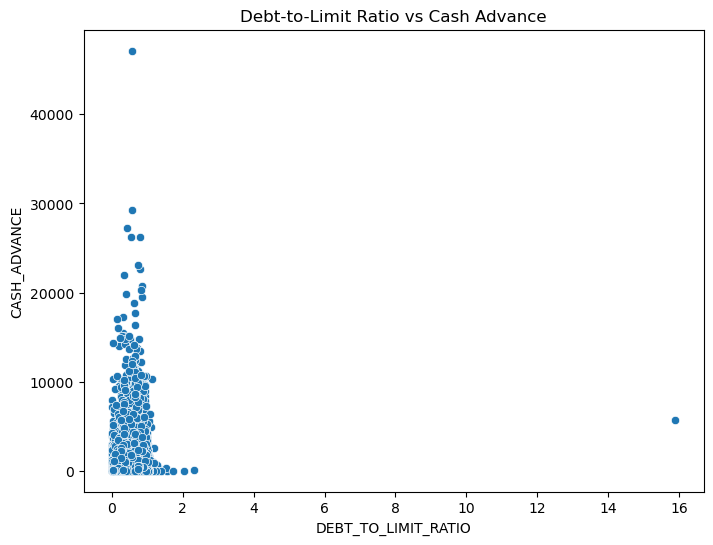

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot: Relationship between Debt-to-Limit Ratio and Cash Advance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DEBT_TO_LIMIT_RATIO', y='CASH_ADVANCE', data=data)
plt.title('Debt-to-Limit Ratio vs Cash Advance')
plt.show()

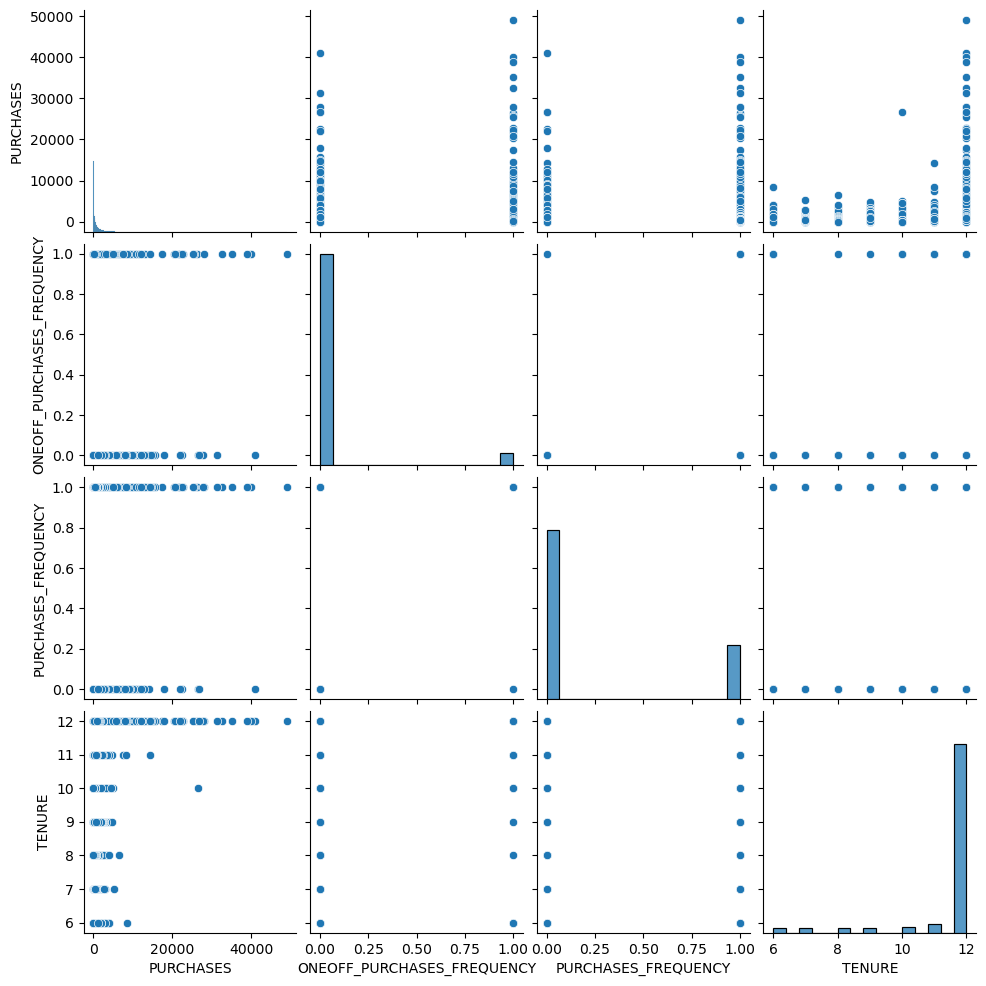

In [179]:
# Pairplot for observing correlations
sns.pairplot(data[['PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY', 'TENURE']], kind='scatter')
plt.show()

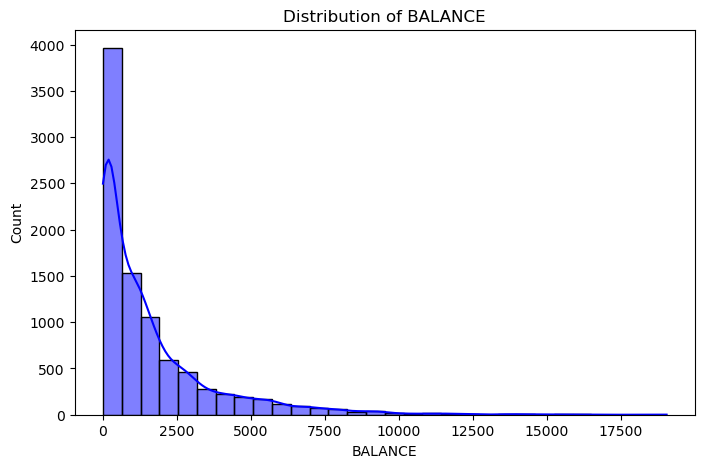

In [180]:
# ---- STEP 3: Data Visualization ----
# Distribution of the 'BALANCE' column
plt.figure(figsize=(8, 5))
sns.histplot(data['BALANCE'], kde=True, bins=30, color='blue')
plt.title("Distribution of BALANCE")
plt.xlabel("BALANCE")
plt.show()

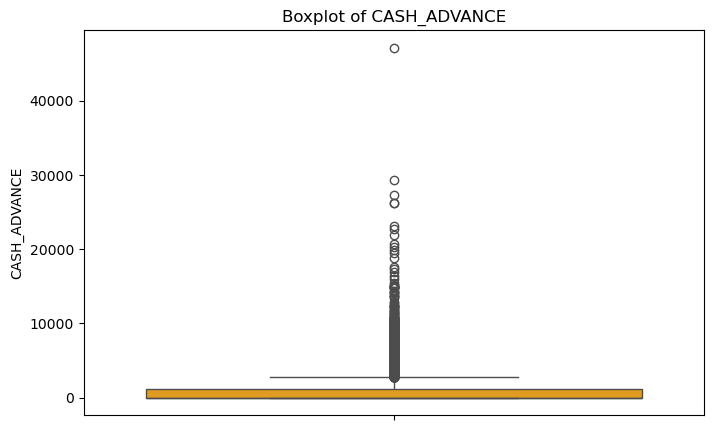

In [181]:
# Boxplot for 'CASH_ADVANCE' to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data['CASH_ADVANCE'], color='orange')
plt.title("Boxplot of CASH_ADVANCE")
plt.show()

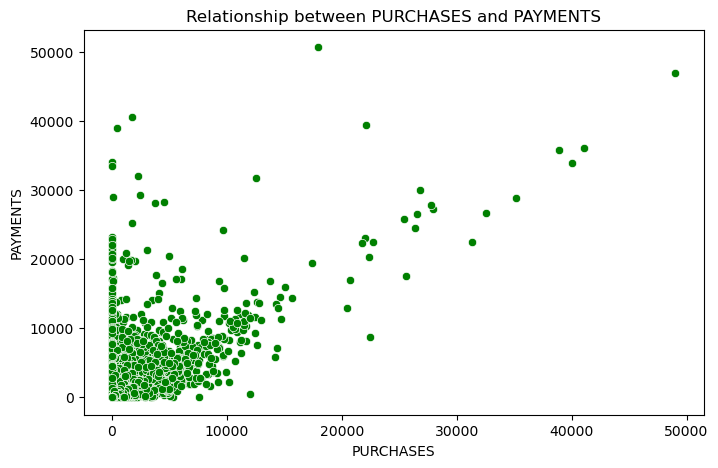

In [182]:
# Relationship between 'PURCHASES' and 'PAYMENTS'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=data, color='green')
plt.title("Relationship between PURCHASES and PAYMENTS")
plt.xlabel("PURCHASES")
plt.ylabel("PAYMENTS")
plt.show()


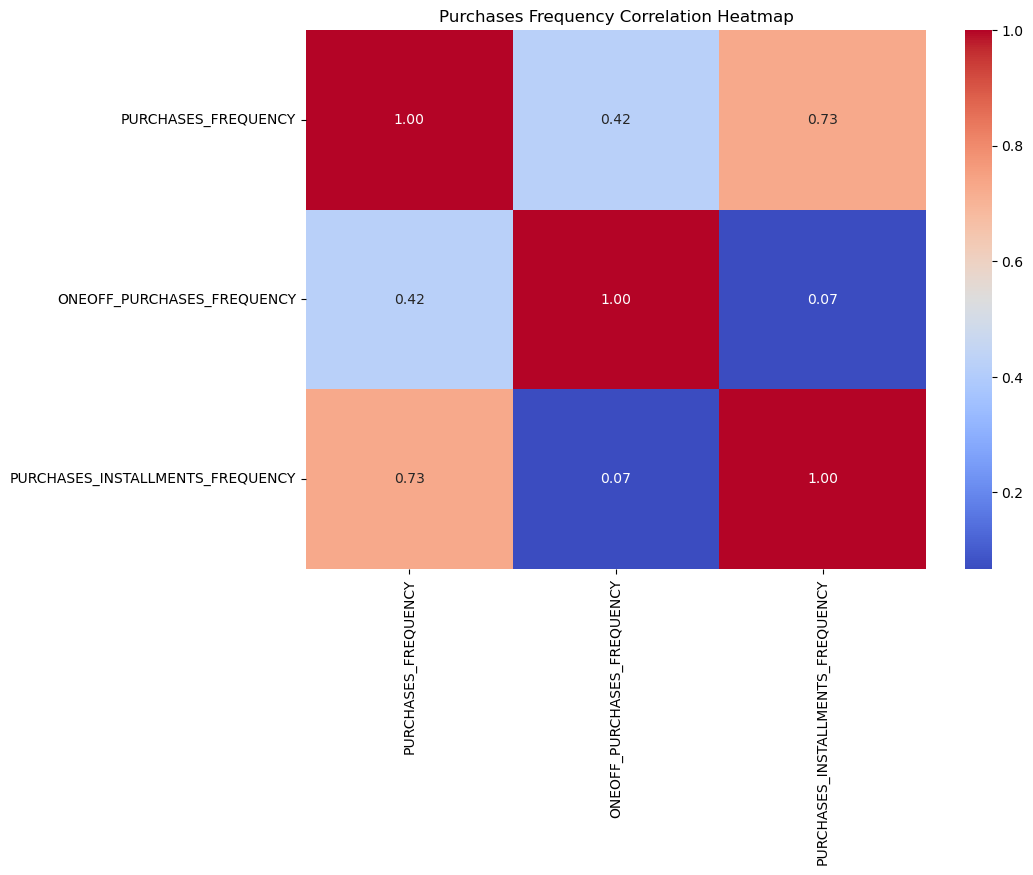

In [183]:
# Heatmap of purchase frequencies
plt.figure(figsize=(10, 7))
frequency_columns = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
sns.heatmap(data[frequency_columns].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Purchases Frequency Correlation Heatmap")
plt.show()

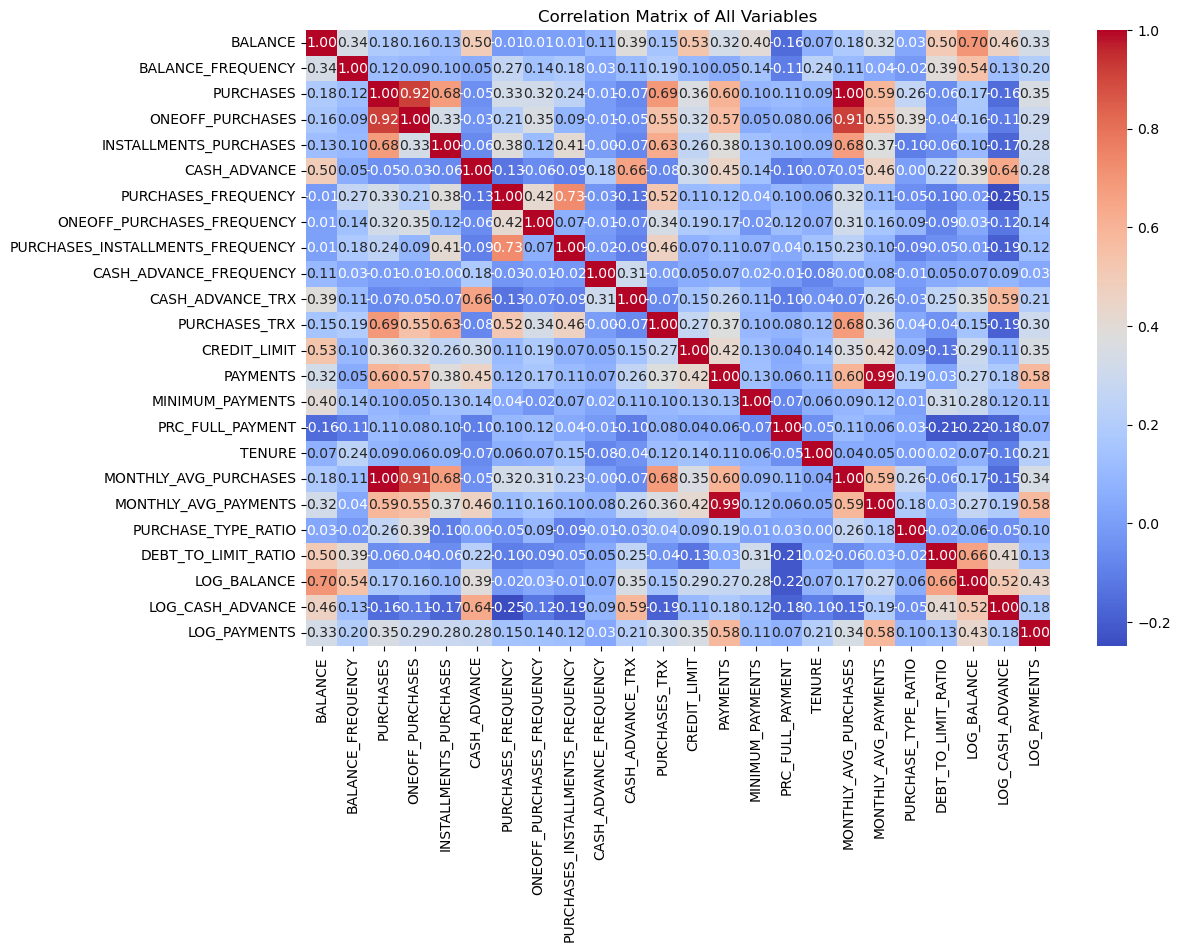

In [184]:
# ---- STEP 4: Correlation Analysis ----
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of All Variables")
plt.show()

In [185]:
# Most correlated features
high_corr = correlation_matrix.unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1]  # Exclude self-correlation
print("\nTop 5 Most Correlated Features:")
print(high_corr[:5])


Top 5 Most Correlated Features:
PURCHASES              MONTHLY_AVG_PURCHASES    0.995847
MONTHLY_AVG_PURCHASES  PURCHASES                0.995847
PAYMENTS               MONTHLY_AVG_PAYMENTS     0.992030
MONTHLY_AVG_PAYMENTS   PAYMENTS                 0.992030
ONEOFF_PURCHASES       PURCHASES                0.916847
dtype: float64


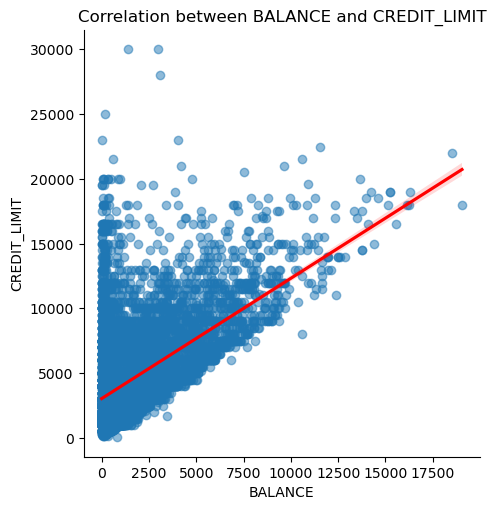

In [186]:
# High Correlation Examples
sns.lmplot(x='BALANCE', y='CREDIT_LIMIT', data=data, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("Correlation between BALANCE and CREDIT_LIMIT")
plt.show()


In [187]:
# Cleanup observations
print("\nAre there customers with very high 'CASH_ADVANCE'?")
print(data[data['CASH_ADVANCE'] > data['CASH_ADVANCE'].quantile(0.95)])



Are there customers with very high 'CASH_ADVANCE'?
      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1        3202                  0          0                 0   
23       3800                  0       4248              3454   
36       7427                  1          0                 0   
39       1411                  0        963               963   
50       4931                  1        901               646   
...       ...                ...        ...               ...   
8705     7302                  1          0                 0   
8804     1704                  0          0                 0   
8813     3335                  0          0                 0   
8857     2330                  1       1320                 0   
8941     5967                  0        214                 0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                          0          6442                    0   
23                       793     

In [188]:
from sklearn.preprocessing import MinMaxScaler

# Scaling numerical features
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print(scaled_data.head())  # Scaled data preview

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002101                0.0   0.001937          0.000000   
1  0.168146                0.0   0.000000          0.000000   
2  0.131019                1.0   0.015763          0.018964   
3  0.087486                0.0   0.030568          0.036775   
4  0.042903                1.0   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.004222      0.000000                  0.0   
1                0.000000      0.136665                  0.0   
2                0.000000      0.000000                  1.0   
3                0.000000      0.004349                  0.0   
4                0.000000      0.000000                  0.0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         1.0      

C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\4108670938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TENURE', data=data, palette='viridis')


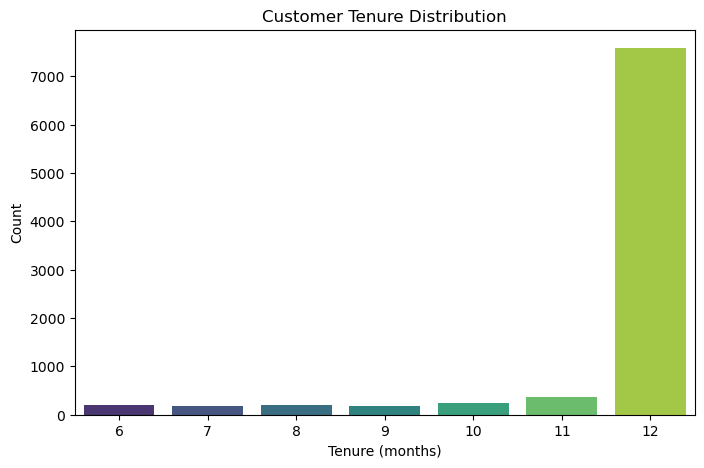

In [189]:
# Check tenure distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='TENURE', data=data, palette='viridis')
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

In [190]:
# ---- STEP 5: Observations ----
print("\nSummary Observations:")
print("""
1. There are missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS', but were filled with mean values.
2. BALANCE has a right-skewed distribution, indicating most users maintain low balances.
3. CASH_ADVANCE shows outliers (some users take very large cash advances).
4. PURCHASE_FREQUENCY metrics are positively correlated.
5. Customers with higher CREDIT_LIMIT tend to maintain higher BALANCE.
6. Tenure distribution peaks at 12 months, indicating most customers are in their first year.
""")


Summary Observations:

1. There are missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS', but were filled with mean values.
2. BALANCE has a right-skewed distribution, indicating most users maintain low balances.
3. CASH_ADVANCE shows outliers (some users take very large cash advances).
4. PURCHASE_FREQUENCY metrics are positively correlated.
5. Customers with higher CREDIT_LIMIT tend to maintain higher BALANCE.
6. Tenure distribution peaks at 12 months, indicating most customers are in their first year.



# UNIVARIATE ANALYSIS 

In [191]:
# ---- 1. UNIVARIATE ANALYSIS ----
print("\n\n### Univariate Analysis ###\n")
print("Summary Statistics for Numerical Columns:")
print(data.describe())



### Univariate Analysis ###

Summary Statistics for Numerical Columns:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1563.983128           0.693966   1002.872402        592.226592   
std     2081.529015           0.460870   2136.571308       1659.798304   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.000000           0.000000     39.000000          0.000000   
50%      873.000000           1.000000    361.000000         38.000000   
75%     2053.750000           1.000000   1110.000000        576.750000   
max    19043.000000           1.000000  49039.000000      40761.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               410.827821    978.630168             0.243352   
std                904.245772   2097.044724             

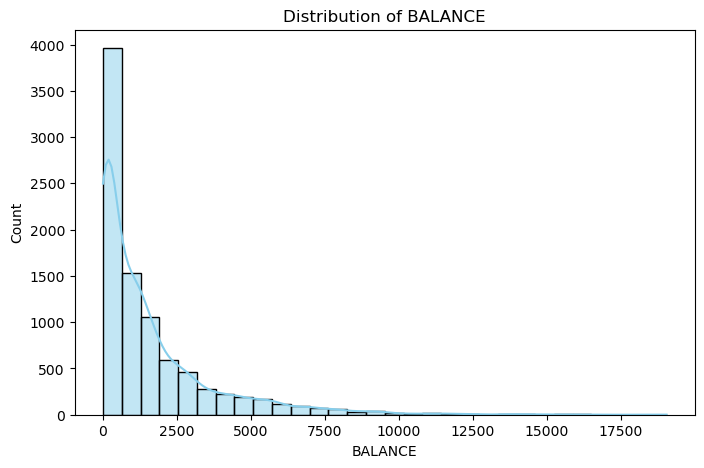

In [192]:
# Distribution of 'BALANCE'
plt.figure(figsize=(8, 5))
sns.histplot(data['BALANCE'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of BALANCE')
plt.xlabel('BALANCE')
plt.show()

C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\4164263693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TENURE', data=data, palette='viridis')


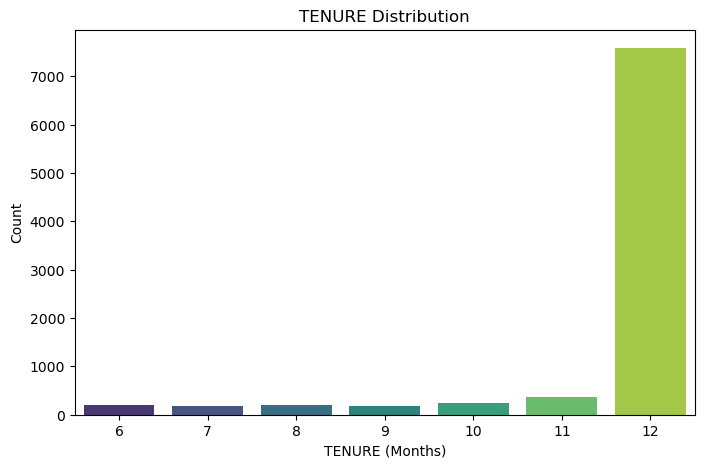

In [193]:
# Countplot for 'TENURE'
plt.figure(figsize=(8, 5))
sns.countplot(x='TENURE', data=data, palette='viridis')
plt.title('TENURE Distribution')
plt.xlabel('TENURE (Months)')
plt.ylabel('Count')
plt.show()

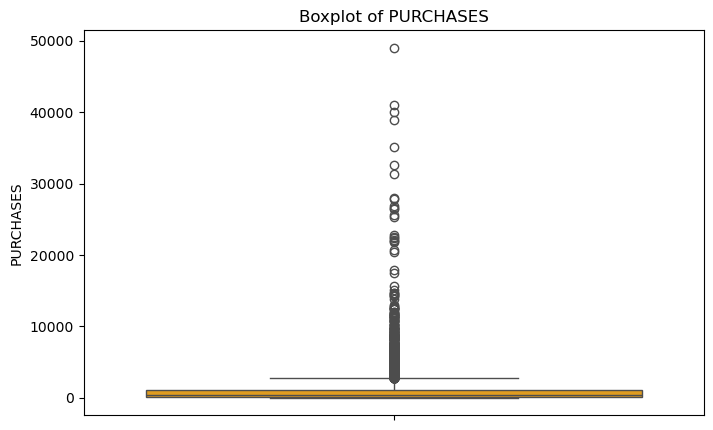

In [194]:
# Boxplot for detecting outliers in 'PURCHASES'
plt.figure(figsize=(8, 5))
sns.boxplot(data['PURCHASES'], color='orange')
plt.title('Boxplot of PURCHASES')
plt.show()



### Bivariate Analysis ###



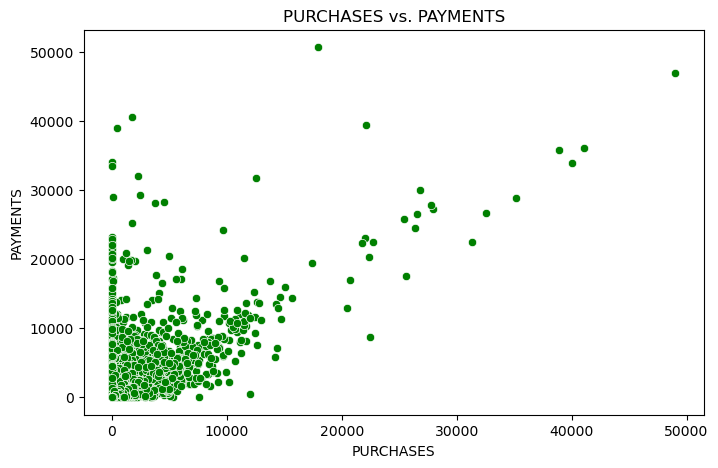

In [195]:
# ---- 2. BIVARIATE ANALYSIS ----
print("\n\n### Bivariate Analysis ###\n")

# Scatterplot: Relationship between 'PURCHASES' and 'PAYMENTS'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=data, color='green')
plt.title('PURCHASES vs. PAYMENTS')
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.show()

C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\3051755233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TENURE', y='BALANCE', data=data, palette='coolwarm')


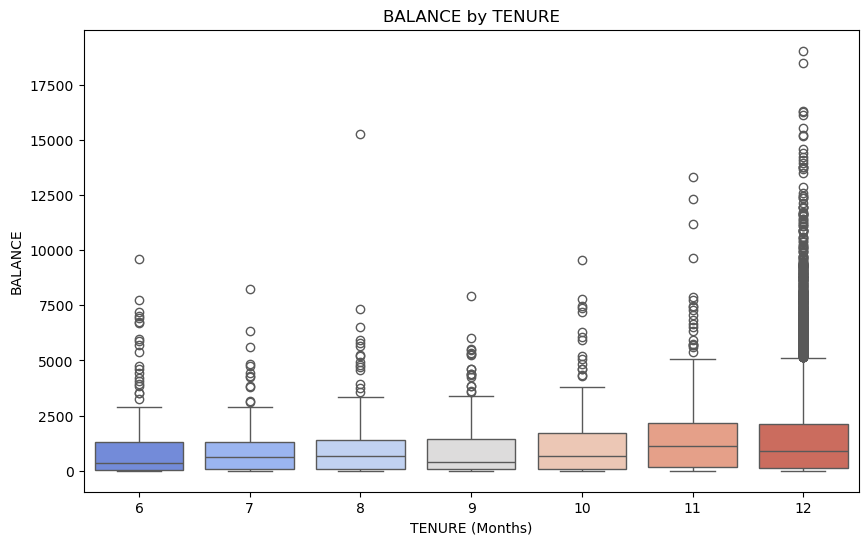

In [196]:
# Boxplot: Distribution of 'BALANCE' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.boxplot(x='TENURE', y='BALANCE', data=data, palette='coolwarm')
plt.title('BALANCE by TENURE')
plt.xlabel('TENURE (Months)')
plt.ylabel('BALANCE')
plt.show()


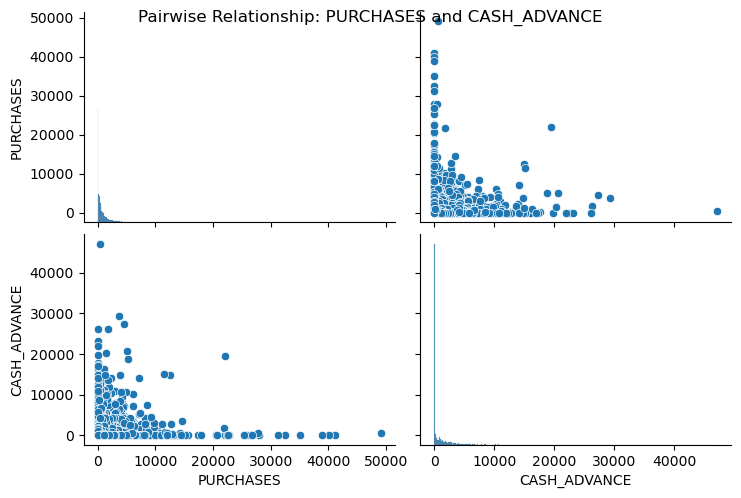

In [197]:
# Pairplot: 'PURCHASES' and 'CASH_ADVANCE'
sns.pairplot(data, vars=['PURCHASES', 'CASH_ADVANCE'], kind='scatter', diag_kind='hist', aspect=1.5)
plt.suptitle('Pairwise Relationship: PURCHASES and CASH_ADVANCE')
plt.show()




### Multivariate Analysis ###



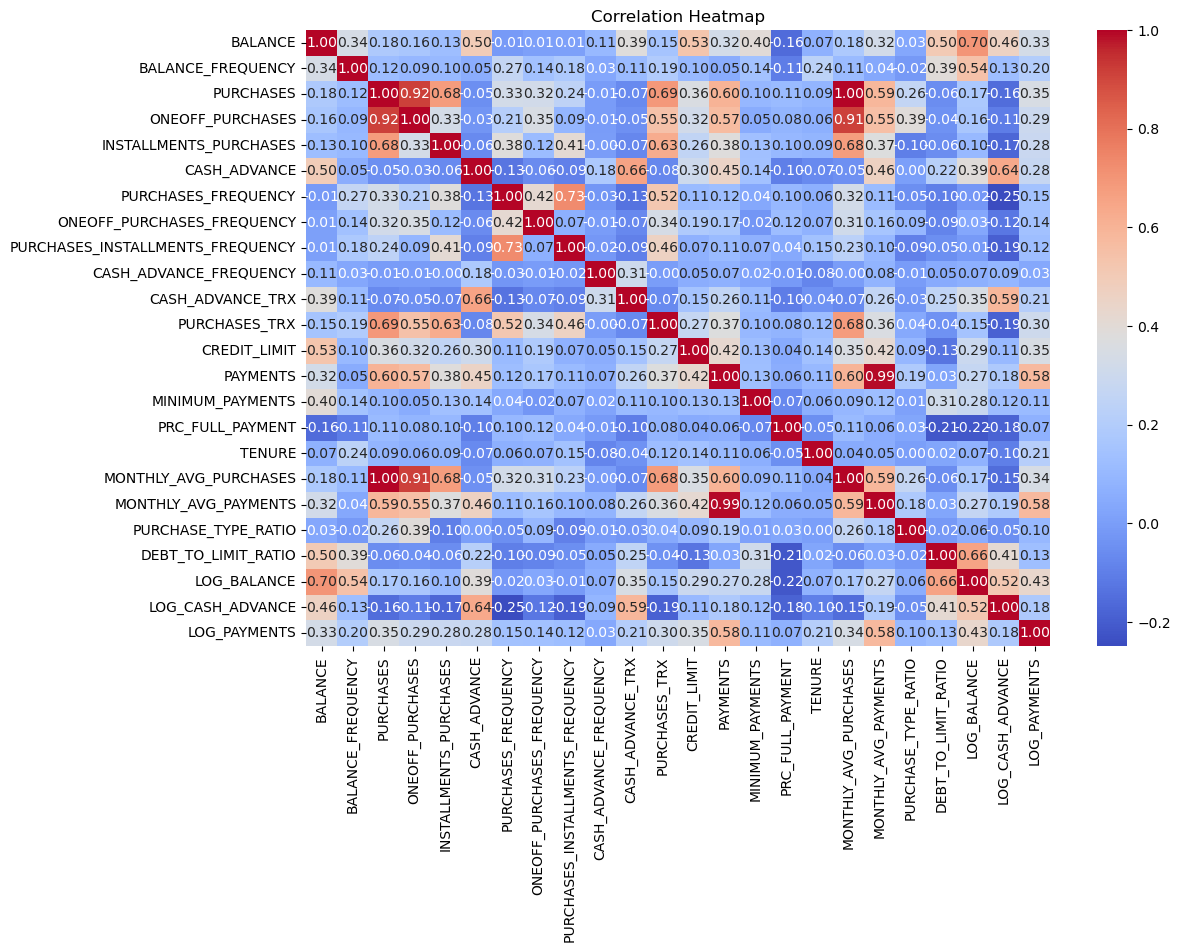

In [198]:
# ---- 3. MULTIVARIATE ANALYSIS ----
print("\n\n### Multivariate Analysis ###\n")

# Correlation heatmap to study relationships
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

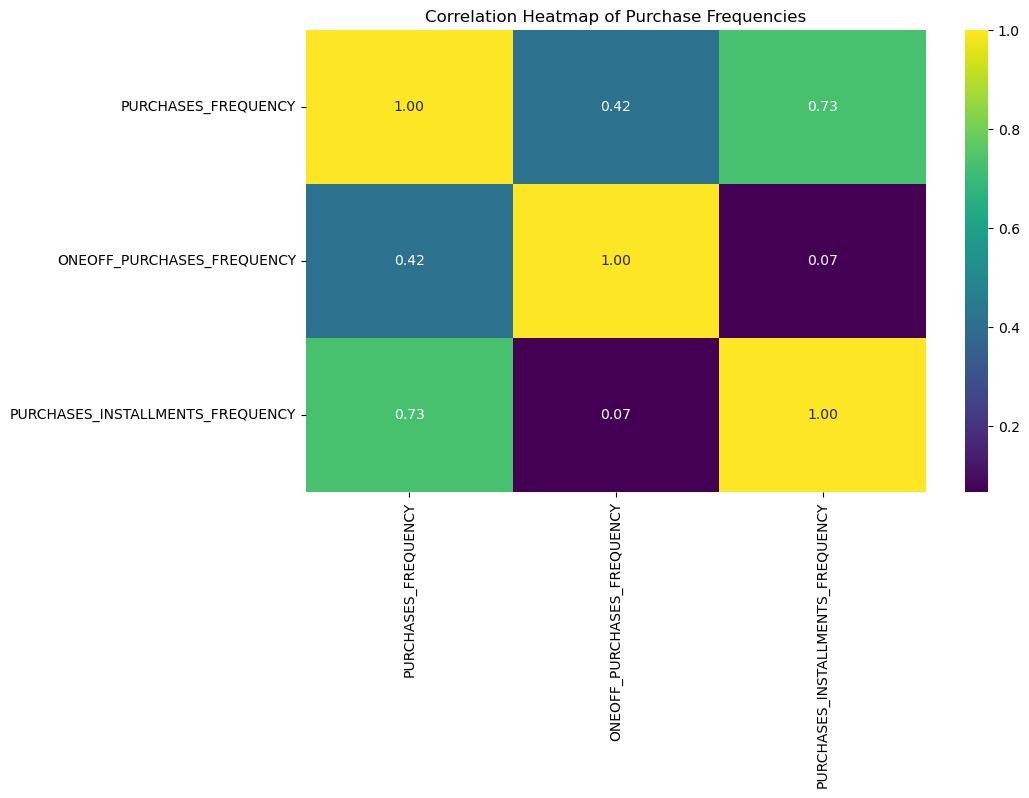

In [199]:
# Heatmap: Relationship between frequency columns
frequency_columns = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
plt.figure(figsize=(10, 6))
sns.heatmap(data[frequency_columns].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Purchase Frequencies')
plt.show()

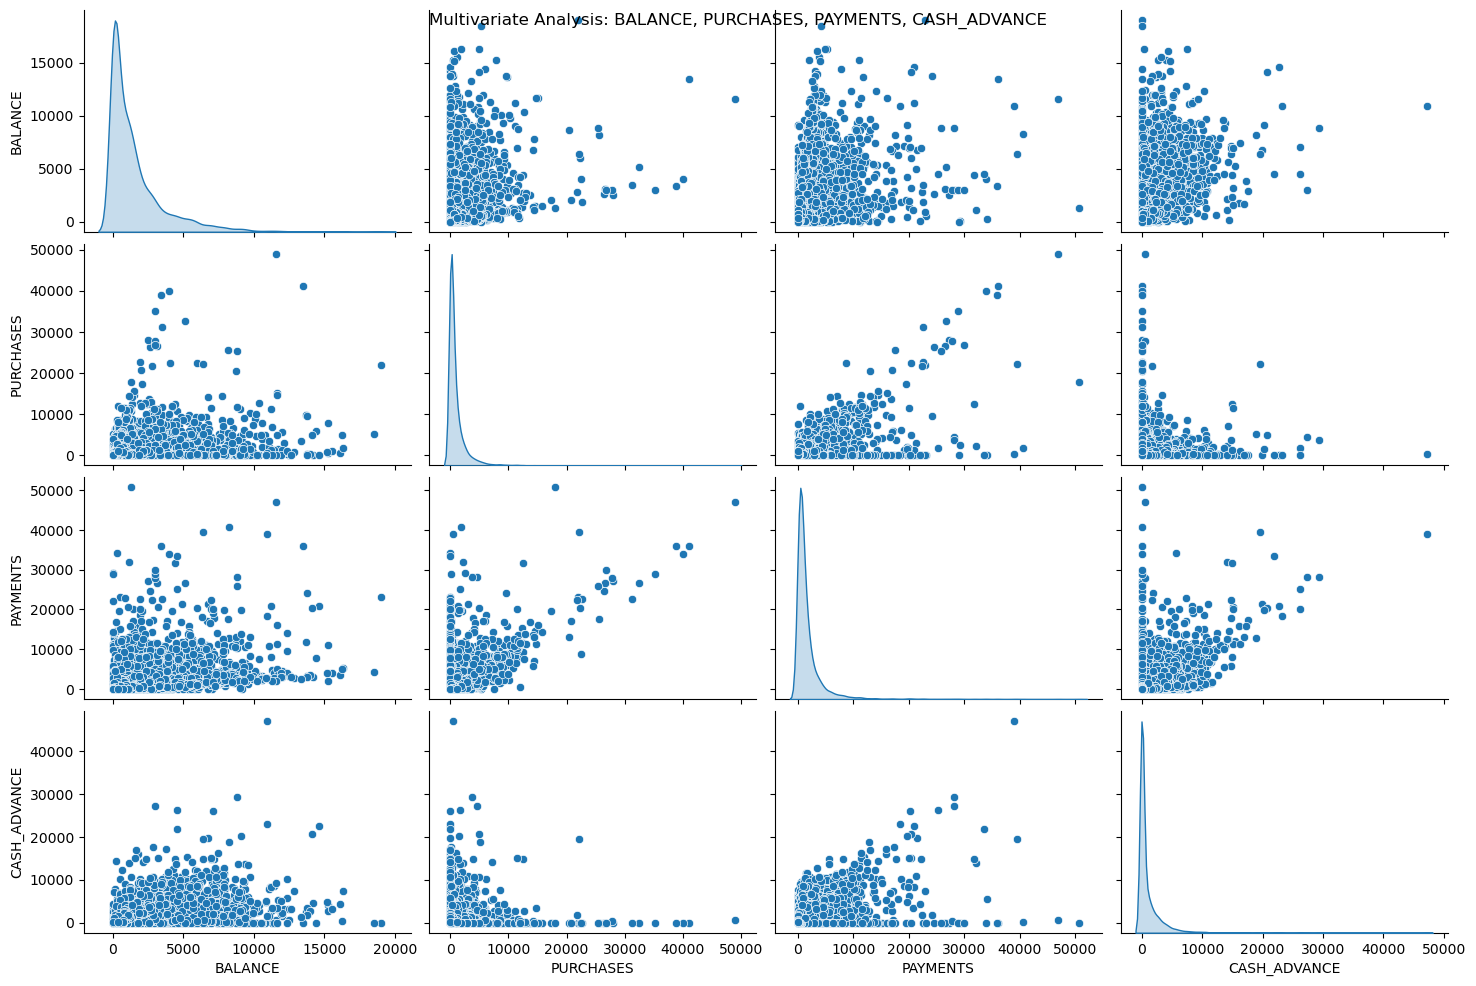

In [200]:
# Pairplot for multiple variables (e.g., PURCHASES, BALANCE, PAYMENTS, CASH_ADVANCE)
sns.pairplot(data, vars=['BALANCE', 'PURCHASES', 'PAYMENTS', 'CASH_ADVANCE'], diag_kind='kde', aspect=1.5)
plt.suptitle('Multivariate Analysis: BALANCE, PURCHASES, PAYMENTS, CASH_ADVANCE')
plt.show()

print("\nAnalysis Insights:")
print("""
1. Univariate Analysis:
   - BALANCE is right-skewed (most balances are small amounts).
   - TENURE shows most customers are in the first year of card usage.

2. Bivariate Analysis:
   - PURCHASES and PAYMENTS show a positive relationship.
   - Higher BALANCE values tend to appear in customers with shorter TENURE durations.

3. Multivariate Analysis:
   - PURCHASES_FREQUENCY metrics (e.g., ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_FREQUENCY) are highly correlated.
   - Positive correlation between BALANCE and CREDIT_LIMIT.

In [201]:
# Select relevant features for clustering
features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
X = data[features]


In [202]:
# Standardize the data (Clustering works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [203]:
print("\nData Standardized for Clustering:")
print(pd.DataFrame(X_scaled, columns=features).head())


Data Standardized for Clustering:
    BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS
0 -0.732187  -0.424944     -0.466697     -0.960378 -0.529088         -0.302407
1  0.786974  -0.469410      2.605417      0.688679  0.818803          0.097565
2  0.447300  -0.107595     -0.466697      0.826100 -0.383660         -0.093204
3  0.049013   0.232220     -0.368935      0.826100 -0.598521         -0.228243
4 -0.358883  -0.461921     -0.466697     -0.905410 -0.364315         -0.257394


Explained Variance by each component: [0.35819206 0.24363977]
Total Explained Variance: 0.60183182047396


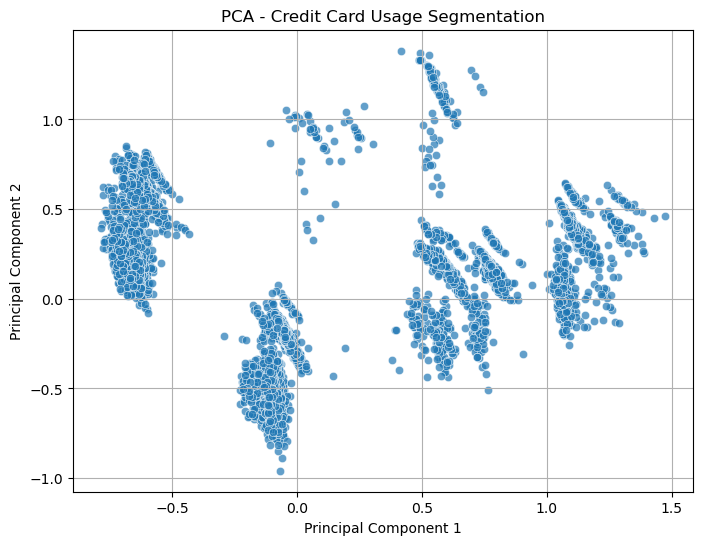

In [218]:
# Apply PCA
pca = PCA(n_components=2)  # We keep 2 principal components for visualization
pca_result = pca.fit_transform(scaled_data)

# Store the PCA results in a DataFrame
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_data, alpha=0.7)
plt.title('PCA - Credit Card Usage Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

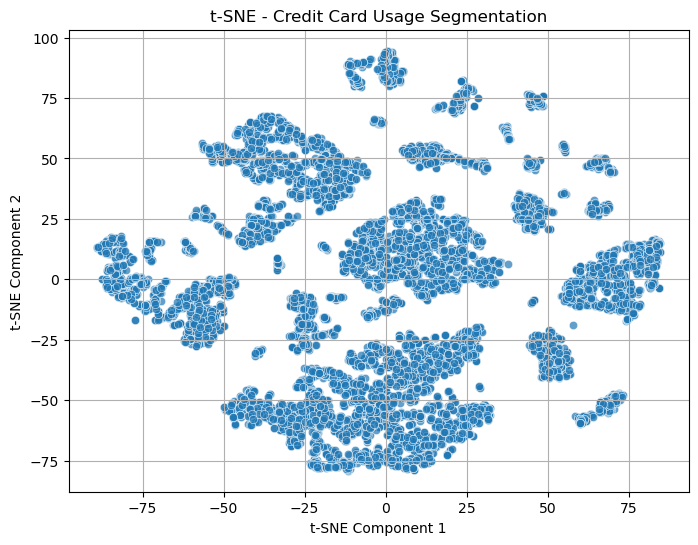

In [219]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Store the t-SNE results in a DataFrame
tsne_data = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_data, alpha=0.7)
plt.title('t-SNE - Credit Card Usage Segmentation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

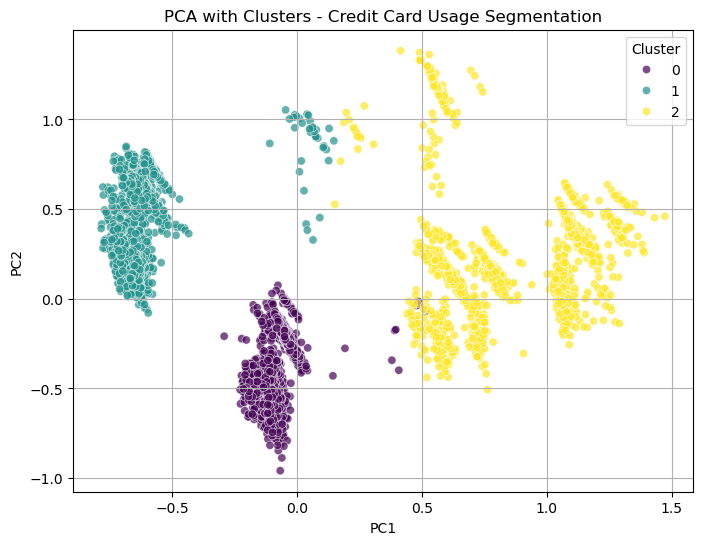

In [220]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Include cluster labels in PCA and t-SNE data
tsne_data['Cluster'] = clusters
pca_data['Cluster'] = clusters

# Visualize PCA with Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_data, palette='viridis', alpha=0.7)
plt.title('PCA with Clusters - Credit Card Usage Segmentation')
plt.grid()
plt.show()


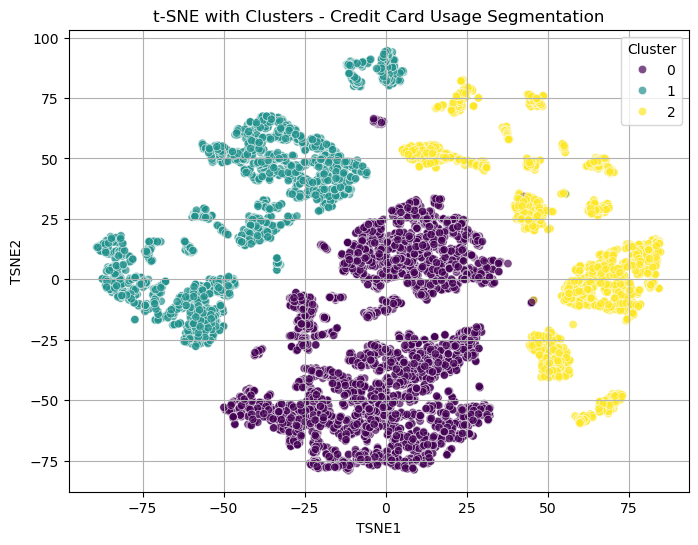

In [221]:
# Visualize t-SNE with Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_data, palette='viridis', alpha=0.7)
plt.title('t-SNE with Clusters - Credit Card Usage Segmentation')
plt.grid()
plt.show()

8. Observations
With PCA and t-SNE, you can visually explore how customers are segmented based on their credit card usage. 
By adding clustering (like K-Means), you can group users into meaningful clusters to describe
segments like "High Usage", "Moderate Usage", "Low Usage" patterns.

In [237]:
# ---- STEP 2: K-Means Clustering ----

# Use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

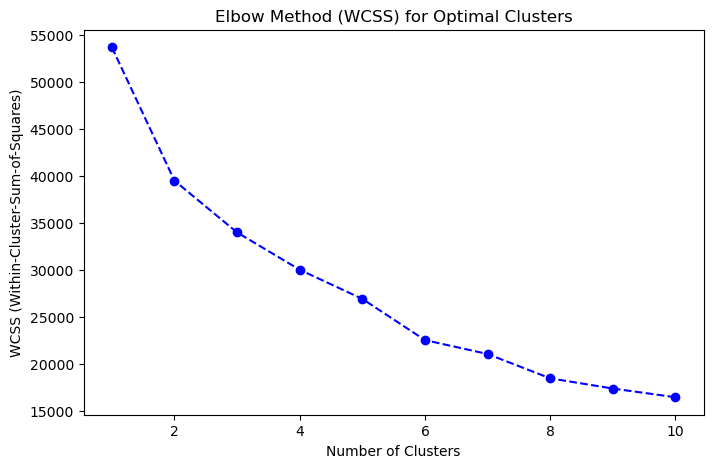

In [238]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method (WCSS) for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

In [239]:
# Choose the optimal number of clusters based on elbow curve (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [240]:
# Cluster summary
print("\nCluster Centers (K-Means):")
print(kmeans.cluster_centers_)
print("\nCluster Assignments:")
print(data['KMeans_Cluster'].value_counts())


Cluster Centers (K-Means):
[[ 1.30124535  4.47496417  1.58848523  2.05148575  5.10792868  0.55314423]
 [-0.34912935 -0.11853713 -0.2536943  -0.28933595 -0.20988681 -0.15906089]
 [ 1.56822735  0.12051604  1.07388281  1.20025755  0.50096843  0.7185276 ]]

Cluster Assignments:
KMeans_Cluster
1    7294
2    1503
0     153
Name: count, dtype: int64


In [241]:
# Select relevant features for clustering
features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
X = data[features]

In [242]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [243]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


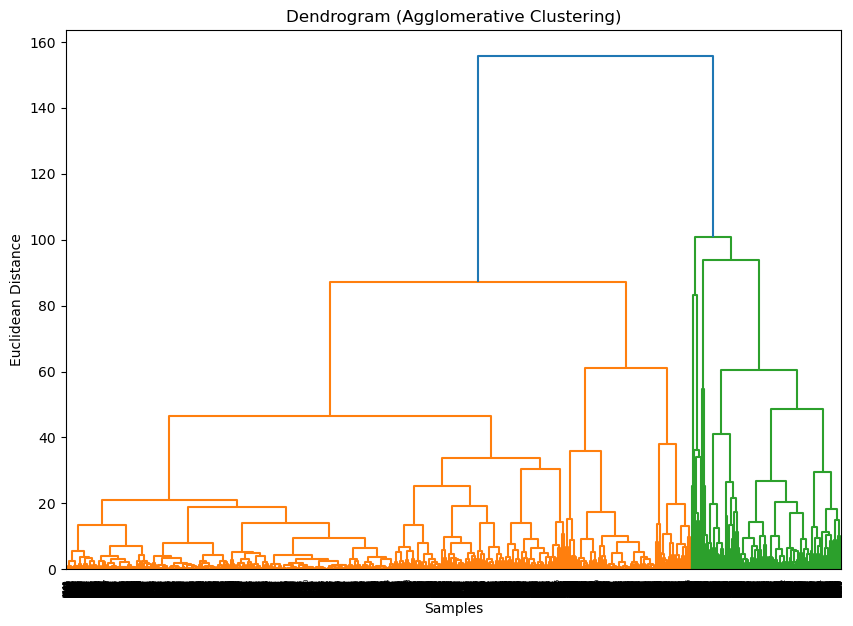

In [244]:
# ---- STEP 3: Agglomerative Clustering ----
# Generate a dendrogram to find the optimal number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
linked = linkage(X_scaled, method='ward')  # Corrected Import and Usage
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Dendrogram (Agglomerative Clustering)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [245]:
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters
optimal_clusters = 3  # Choose your optimal number of clusters

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')  # Note: affinity is not needed with 'ward'
data['Agglomerative_Cluster'] = agg_cluster.fit_predict(X_scaled)

# Print cluster counts
print("\nFinal Cluster Counts (Agglomerative):")
print(data['Agglomerative_Cluster'].value_counts())


Final Cluster Counts (Agglomerative):
Agglomerative_Cluster
1    7231
0    1603
2     116
Name: count, dtype: int64


C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\2937872843.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglo_Cluster', y='BALANCE', data=data, palette='viridis')


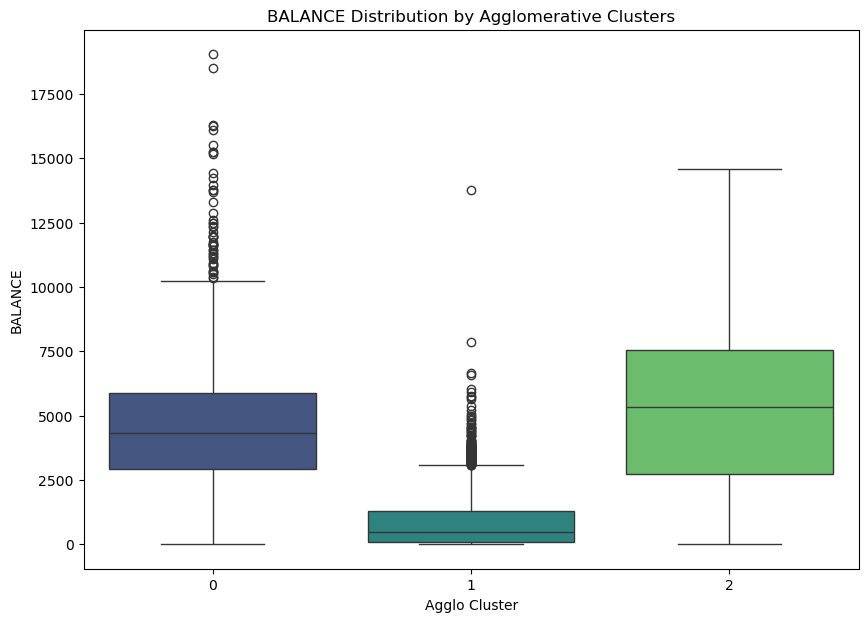

In [231]:
# Perform Agglomerative Clustering (Choose number of clusters, e.g., k=3)
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Agglo_Cluster'] = agg_cluster.fit_predict(X_scaled)

# Visualize Agglomerative Clustering Results (Example: BALANCE vs. Clusters)
plt.figure(figsize=(10, 7))
sns.boxplot(x='Agglo_Cluster', y='BALANCE', data=data, palette='viridis')
plt.title('BALANCE Distribution by Agglomerative Clusters')
plt.xlabel('Agglo Cluster')
plt.ylabel('BALANCE')
plt.show()

C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\3216866505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='BALANCE', data=data, palette='coolwarm')


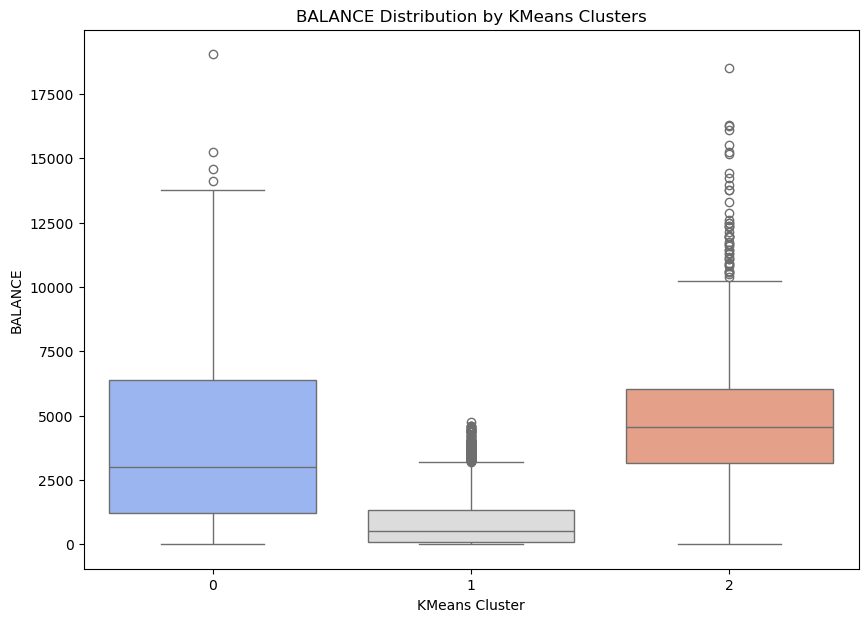

In [232]:
# ---- STEP 4: Interpret Results ----

# Cluster Profiles - Analyze distributions of each feature for the clusters
plt.figure(figsize=(10, 7))
sns.boxplot(x='KMeans_Cluster', y='BALANCE', data=data, palette='coolwarm')
plt.title('BALANCE Distribution by KMeans Clusters')
plt.xlabel('KMeans Cluster')
plt.ylabel('BALANCE')
plt.show()

C:\Users\Nazmin Shaikh\AppData\Local\Temp\ipykernel_2700\1325255440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglo_Cluster', y='PURCHASES', data=data, palette='viridis')


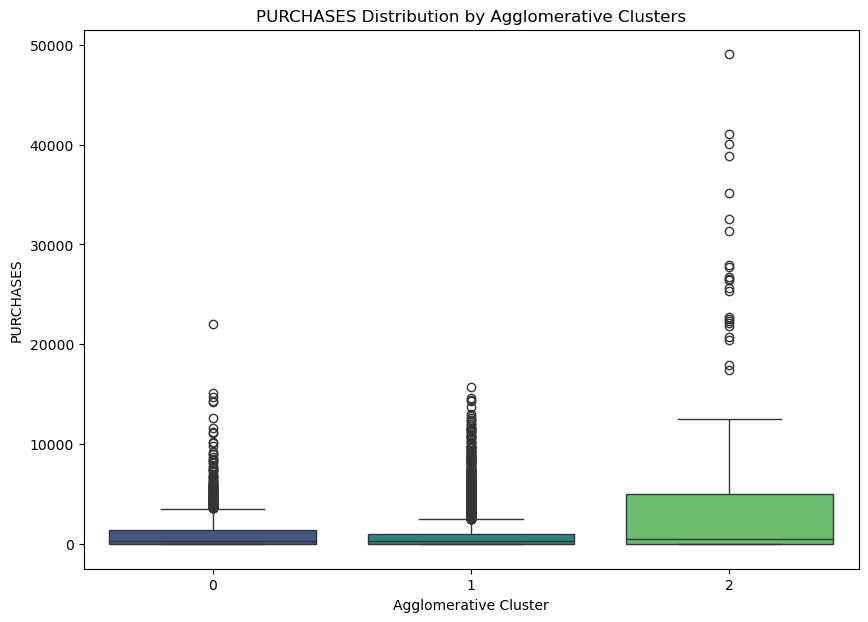

In [233]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Agglo_Cluster', y='PURCHASES', data=data, palette='viridis')
plt.title('PURCHASES Distribution by Agglomerative Clusters')
plt.xlabel('Agglomerative Cluster')
plt.ylabel('PURCHASES')
plt.show()


In [234]:
# ---- Print Final Cluster Counts ----
print("\nFinal Cluster Counts (KMeans):")
print(data['KMeans_Cluster'].value_counts())
print("\nFinal Cluster Counts (Agglomerative):")
print(data['Agglomerative_Cluster'].value_counts())


Final Cluster Counts (KMeans):
KMeans_Cluster
1    7294
2    1503
0     153
Name: count, dtype: int64

Final Cluster Counts (Agglomerative):
Agglomerative_Cluster
1    7231
0    1603
2     116
Name: count, dtype: int64
